### **1. Simulate any random rectangular matrix A**

In [1]:
import numpy as np

mat = np.matrix(np.random.randint(low = 1, high=5, size = (4,4)))
display(mat)

matrix([[1, 1, 3, 1],
        [4, 2, 2, 4],
        [2, 4, 4, 3],
        [4, 1, 3, 4]])

- What is the rank and trace of A?


In [2]:
print(f"The rank of the matrix is {np.linalg.matrix_rank(mat)} and it's the maximum number of rows or columns linearly independent")

The rank of the matrix is 4 and it's the maximum number of rows or columns linearly independent


- What is the determinant of A?

In [3]:
print(f"The determinat of the matrix is {np.linalg.det(mat) :.1f}")

The determinat of the matrix is 12.0


- Can you invert A? How?

We can use np.linalg.inv to math it. If the determinat is different to zero, we can find the inverse matrix

In [4]:
if np.linalg.det(mat) != 0:
    print('The inverse matrix is:')
    display(np.linalg.inv(mat))
else:
    print(f"The inverse of the matrix doesn't exist, det(matrix) must be <> 0")


The inverse matrix is:


matrix([[ 1.66666667e+00,  2.00000000e+00, -1.00000000e+00,
         -1.66666667e+00],
        [ 3.33333333e-01,  7.50000000e-01, -4.16333634e-17,
         -8.33333333e-01],
        [ 3.33333333e-01, -2.50000000e-01,  4.16333634e-17,
          1.66666667e-01],
        [-2.00000000e+00, -2.00000000e+00,  1.00000000e+00,
          2.00000000e+00]])

- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

Eigenvalues

In [5]:
print("eigenvalues of A'A:")
display(np.linalg.eig(np.dot(mat.T, mat))[0])
print("eigenvalues of AA':")
display(np.linalg.eig(np.dot(mat, mat.T))[0])

eigenvalues of A'A:


array([1.25873611e+02, 1.03647556e+01, 4.05628957e-02, 2.72107045e+00])

eigenvalues of AA':


array([1.25873611e+02, 1.03647556e+01, 2.72107045e+00, 4.05628957e-02])

Note that eigenvalues are the same

Eigenvectors

In [6]:
print("eigenvectors of A'A")
display(np.linalg.eig(np.dot(mat.T, mat))[1])
print("eigenvectors of AA'")
display(np.linalg.eig(np.dot(mat, mat.T))[1])

eigenvectors of A'A


matrix([[ 0.51849167,  0.55040474, -0.65335409,  0.03673474],
        [ 0.37166729, -0.55944839, -0.21618852, -0.70862081],
        [ 0.51935345, -0.51934868,  0.01278574,  0.67851711],
        [ 0.56859634,  0.33815539,  0.72541539, -0.19005695]])

eigenvectors of AA'


matrix([[ 0.2688942 ,  0.38172371, -0.71146457, -0.52516767],
        [ 0.54641298, -0.43381737,  0.40828674, -0.58867417],
        [ 0.56214134,  0.68332277,  0.37410803,  0.27768738],
        [ 0.55957652, -0.44627288, -0.43262371,  0.54822565]])

Eigenvectors are diferent

### **2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates**

- Let's download the pics from the agreed directory

In [7]:
import gdown # see requirements.txt

gdown.download_folder(url = 'https://drive.google.com/drive/folders/1f1aZ4i1lYsRaW9ID76iHfGztKdmAsg21',
               output = '../collected_images',
               quiet = True
               )

['../collected_images/AlejandroC.jpeg',
 '../collected_images/Daniel V.jpeg',
 '../collected_images/DanielaAguiarV.jpg',
 '../collected_images/DavidG.jpg',
 '../collected_images/JD.jpg',
 '../collected_images/JorgeMorales',
 '../collected_images/JoseAlcocer.jpg',
 '../collected_images/JuanCh.png',
 '../collected_images/JuanPabloM.png',
 '../collected_images/Laura.jpeg',
 '../collected_images/Lina Martinez.jpeg',
 '../collected_images/MariaMartinez.jpg',
 '../collected_images/Robinson_Alvarez.jpeg',
 '../collected_images/Santiago M.jpeg',
 '../collected_images/SantiagoRG.jpeg']

- Now, we collect the paths of the downloaded images and plot some pictures

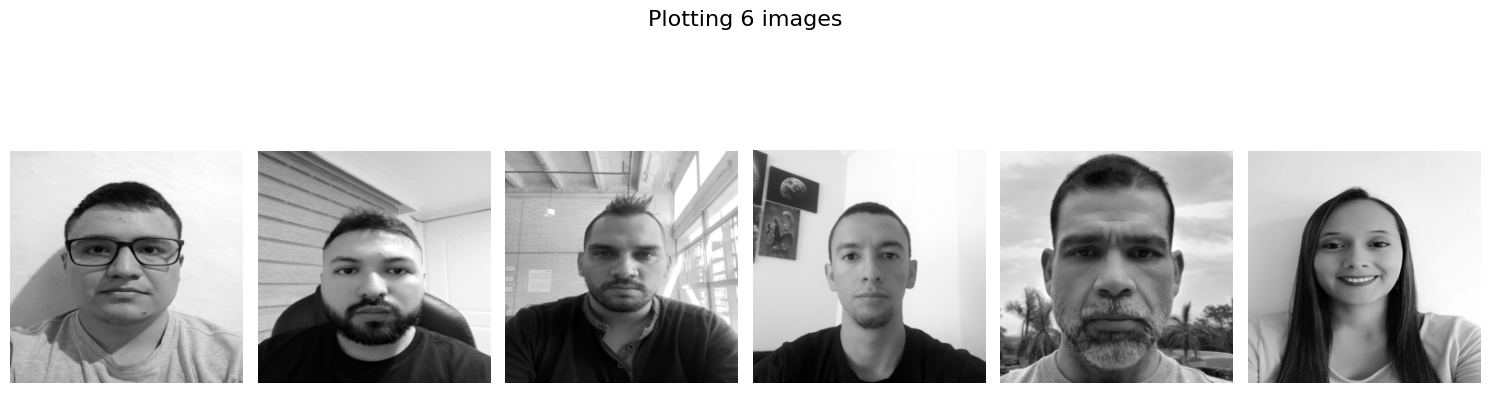

In [8]:
import sys
import os
from PIL import Image

module_path = os.path.abspath(os.path.join('..')) # this is to add lib folder to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.utils import read_some_images, read_one_image, plotImages # see utils.py
import matplotlib.pyplot as plt

images_names = [i for i in list(os.walk('../collected_images'))[0][2] if '.txt' not in i.lower()]# collect file names in the defined folder
images_path = list(map(lambda x: '../collected_images/'+x, images_names)) # add the path of the file

all_images = read_some_images(images_path)
plotImages(all_images, n_images= 6)

- Let's plot my face

Image of Jose Alcocer has been found at ../collected_images/JoseAlcocer.jpg


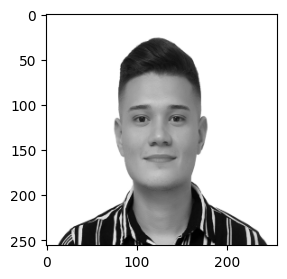

In [9]:
my_face_img_path = None
for path in images_path:
    if 'ALCOCER' in path.upper():
        my_face_img_path = path
        print(f"Image of Jose Alcocer has been found at {path}")

my_face_img = read_one_image(my_face_img_path)
plt.figure(figsize=(3,3))
plt.imshow(my_face_img, cmap = 'gray')
plt.show()

- Calculate and plot the average face of the cohort

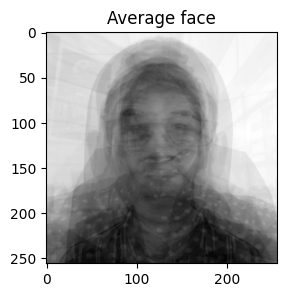

In [10]:
plt.figure(figsize=(3,3))
avg_face = np.average(all_images, axis = 0)
plt.title('Average face')
plt.imshow(avg_face , cmap = 'gray')
plt.show()

- How distant is your face from the average? How would you measure it?

We can try to measure it thinking about euclidean distance, and this is the square root of sum squared of the differences between the coordinates of 2 points.

Note that euclidean distance is L2 norm, and with numpy.linal.norm, we can set this parameter with order = 2, see more in [Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [11]:
import pandas as pd

euclidean_distances = pd.DataFrame(columns=['image', 'euclidean_distance_from_avg_face']) # DataFrame to save results
for path in images_path:
    aux_img = read_one_image(path)
    ed = np.linalg.norm(aux_img.flatten() - avg_face.flatten(), ord = 2) # euclidean distance
    euclidean_distances.loc[len(euclidean_distances)] = {'image': path.replace('../collected_images/', '').split('.')[0], 'euclidean_distance_from_avg_face': round(ed, 2)}

euclidean_distances.sort_values(by = 'euclidean_distance_from_avg_face', ascending= True, inplace=True) # sorted by least distance
euclidean_distances.reset_index(drop=True, inplace = True)
euclidean_distances

,image,euclidean_distance_from_avg_face
0,JD,49.06
1,Daniel V,49.42
2,SantiagoRG,49.70
3,Laura,50.26
4,JuanPabloM,52.92
5,JuanCh,56.35
6,DanielaAguiarV,56.46
7,Robinson_Alvarez,56.93
8,Santiago M,58.81
9,JorgeMorales,61.37


What about me?

In [12]:
print(f"I'm in the position {euclidean_distances[euclidean_distances.image.str.contains('alcocer', case=False)].index[0]+1} of nearest faces to the avg face\
with an euclidean distance of {euclidean_distances[euclidean_distances.image.str.contains('alcocer', case=False)]['euclidean_distance_from_avg_face'].values[0]}")

I'm in the position 12 of nearest faces to the avg facewith an euclidean distance of 67.64


### **4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?**

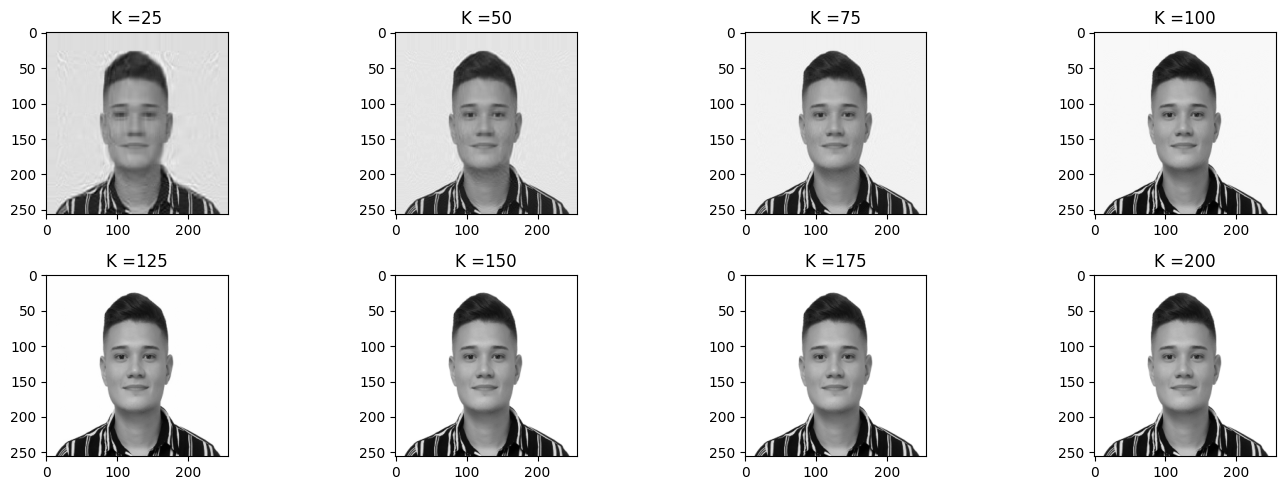

In [13]:
from lib.utils import svd_scratch # see utils.py

# notice that n_components is a init parameter, but it's programmed as the number of singular values

singular_values = [25, 50, 75, 100, 125, 150, 175, 200]
rows = 2
cols = 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (15,5))
i=0
for row in range(rows):
    for col in range(cols):
        svd = svd_scratch(n_components=singular_values[i])
        img_transformed = svd.fit_transform(my_face_img)
        axes[row,col].set_title('K ='+str(singular_values[i]))
        axes[row, col].imshow(img_transformed, cmap = 'gray')
        i += 1
    plt.tight_layout()
plt.show()


We can see with k = 50 we have a good reconstruction

S or sigma is a diagonal matrix containing the square roots of Eigenvalues and also can meausure the relative importance or the explained variance of every component. So, we can suppose an optimal number of components for compression based on this

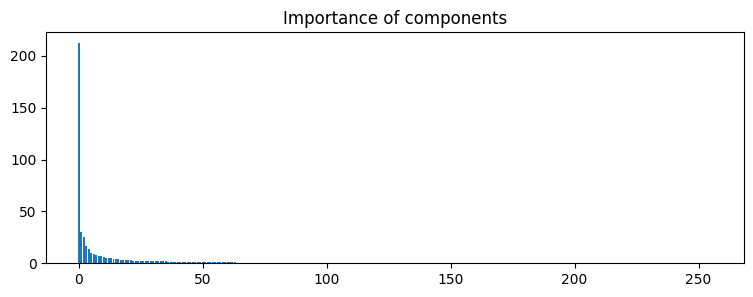

In [14]:
svd = svd_scratch() # all the components
img_transformed = svd.fit_transform(my_face_img)
s = svd.sigma # extract s 

plt.figure(figsize=(9,3))
plt.title('Importance of components')
plt.bar(np.arange(len(np.diag(s))), np.diag(s))
plt.show()

- How to measure how approximate is the compressed images from the original?

We can think about mean absolute error, and could help us to quantify the loss. We have seen previously that the compressed image can be generated with an acceptable quality and low rank, so we expect MSE should be low or close to zero

In [15]:
from sklearn.metrics import mean_absolute_error
svd = svd_scratch(n_components=50) # all the components
img_transformed = svd.fit_transform(my_face_img)

print(f"MAE: {mean_absolute_error(my_face_img, img_transformed)}")

MAE: 0.010000949185418405
